In [1]:
%run glue.py
from prophet import log_transform, inverse_log_transform, prophesy

In [2]:
# How many records have data successfully harvested from Discogs?
len(df_popsike['release_id'].unique())

183

In [3]:
len(df_discogs['release_id'].unique())

263

In [4]:
# amount of records we have in both dataframes
unique_ids = df_popsike[df_discogs['release_id'].isin(
        df_popsike['release_id']
    )]['release_id'].unique()
print(len(unique_ids))

176


/home/ken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [5]:
df_popsike

,release_id,year,title,artist,min,avg,max
0,1480386,2010-01-01,For Emma,Bon Iver,27,46,101
1,1480386,2011-01-01,For Emma,Bon Iver,27,38,44
2,1480386,2012-01-01,For Emma,Bon Iver,33,35,41
3,1480386,2013-01-01,For Emma,Bon Iver,27,34,48
4,1480386,2014-01-01,For Emma,Bon Iver,24,46,109
5,1480386,2015-01-01,For Emma,Bon Iver,25,32,136
6,1480386,2016-01-01,For Emma,Bon Iver,24,32,240
7,1480386,2017-01-01,For Emma,Bon Iver,24,32,674
8,1480386,2018-01-01,For Emma,Bon Iver,24,34,385
9,1480386,2019-01-01,For Emma,Bon Iver,26,32,141


In [6]:
# NOTE NOTE NOTE NOTE TODO
# this doesn't actually work
df_both = df_popsike[df_discogs['release_id'].isin(df_popsike['release_id'])]

/home/ken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [7]:
df_both = df_both.reset_index()

In [8]:
# grab a random release and put it in a DataFrame
this_release = int(df_both.sample()['release_id'])
df_current = df_popsike[df_popsike['release_id'] == this_release].copy()

In [9]:
# ADDED FOR PROPHET LAYERING
df_future = prophesy(df_current)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [10]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

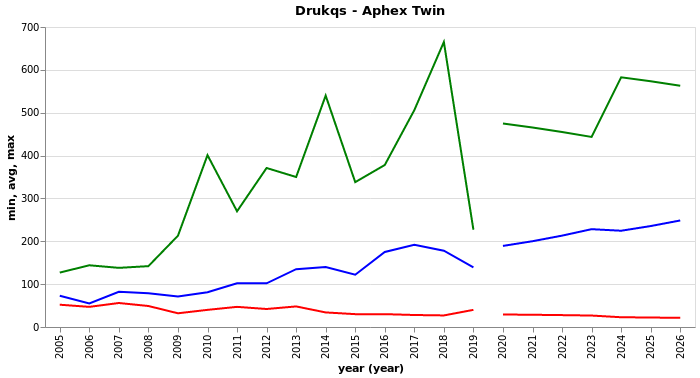

In [11]:
# chart min/avg/max
base = alt.Chart(df_current.reset_index(), width=650).encode(x='year(year):O').properties(
    title=df_current.iloc[0]['title'] + ' - ' +  df_current.iloc[0]['artist']
)

future = alt.Chart(df_future.reset_index(), width=650).encode(x='year(year):O').properties()

alt.layer(
    base.mark_line(color='red').encode(y='min:Q'),
    base.mark_line(color='blue').encode(y='avg:Q'),
    base.mark_line(color='green').encode(y='max:Q'),
    future.mark_line(color='red').encode(y='min:Q'),
    future.mark_line(color='blue').encode(y='avg:Q'),
    future.mark_line(color='green').encode(y='max:Q')
).interactive()


In [ ]:
# see what we found on popsike
df_popsike[df_popsike['release_id'] == this_release]

In [ ]:
# see what we found on discogs
df_discogs[df_discogs['release_id'] == this_release].sort_values(by='date')